# 1. Import Libraries & Tools

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

In [2]:
# Membuka browser
driver = webdriver.Chrome()

In [4]:
# Mengakses link dengan webdriver
url = 'https://www.tokopedia.com/search?navsource=&page=1&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st='
driver.get(url)

In [5]:
# Mengambil element html
html = driver.page_source

# Menguraikan element HTML nya
soup = BeautifulSoup(html, 'html.parser')

# 2. Web Scraping

Proses penulisan code untuk melakukan pengambilan data seblak di website tokopedia dengan membuat list kosong untuk menampung hasil web scraping dan membuat iterasi agar bisa menjalankan scrapping di 10 halaman

In [35]:
# Membuat list kosong untuk menampung data seblak yang akan kita scraping di website tokopedia
list_nama = []
list_harga = []
list_toko = []
list_lokasi = []
list_terjual = []
list_rating = []

# Membuat iterasi agar bisa menjalankan scrapping di 10 halaman
for i in range(1, 11):
    url = f"https://www.tokopedia.com/search?navsource=&page={i}&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st="
    driver.get(url)

    # Membuat time sleep agar proses scrapping menunggu 10 detik untuk meload data di website sebelum berpindah ke halaman berikutnya
    time.sleep(10)
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    # Menentukan box agar proses pengambilan data terfokus pada 1 box
    boxes = soup.find_all('div', {'class': 'css-1asz3by'})
    for box in boxes:
        # Check if the product is not a promotion (adjust class or other criteria as needed)
        if 'css-1rzg7ys' not in box.get('class', []):
            try:
                element_nama = box.find('div', {'class': "prd_link-product-name css-3um8ox"})
                list_nama.append(element_nama.get_text())
            except:
                list_nama.append(None)

            try:
                element_harga = box.find('div', {'class': "prd_link-product-price css-h66vau"})
                list_harga.append(element_harga.get_text())
            except:
                list_harga.append(None)

            try:
                element_toko = box.find('span', {'class': "prd_link-shop-name css-1kdc32b flip"})
                list_toko.append(element_toko.get_text())
            except:
                list_toko.append(None)

            try:
                element_lokasi = box.find('span', {'class': "prd_link-shop-loc css-1kdc32b flip"})
                list_lokasi.append(element_lokasi.get_text())
            except:
                list_lokasi.append(None)

            try:
                element_terjual = box.find('span', {'class': "prd_label-integrity css-1sgek4h"})
                list_terjual.append(element_terjual.get_text().split()[0])
            except:
                list_terjual.append(None)

            try:
                element_rating = box.find('span', {'class': "prd_rating-average-text css-t70v7i"})
                list_rating.append(element_rating.get_text())
            except:
                list_rating.append(None)

data = pd.DataFrame()

data['Nama Produk'] = list_nama
data['Harga Produk'] = list_harga
data['Nama Toko'] = list_toko
data['Lokasi'] = list_lokasi
data['Terjual'] = list_terjual
data['Rating'] = list_rating

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Nama Produk   1116 non-null   object
 1   Harga Produk  1116 non-null   object
 2   Nama Toko     1044 non-null   object
 3   Lokasi        1044 non-null   object
 4   Terjual       1094 non-null   object
 5   Rating        1063 non-null   object
dtypes: object(6)
memory usage: 52.4+ KB


## Analisa DataFrame

* Terdapat 6 kolom dengan `Nama Produk`, `Harga Produk`, `Nama Toko`, `Lokasi`, `Terjual`, `Rating` dengan tipe data masih berupa **String**
* Untuk tipe data di kolom `Harga Produk`, `Terjual`, dan `Rating` akan kita ubah menjadi **numerik** agar nantinya dapat dilakukan analisa penjualan

# 3. Data Preparation

Menampilkan hasil data yg telah di scrapping menjadi dataframe

In [39]:
data

,Nama Produk,Harga Produk,Nama Toko,Lokasi,Terjual,Rating
0,Kylafood Seblak Mie Baso,Rp24.200,None,None,4,4.9
1,Seblak Karuhun,Rp11.880,None,None,60+,5.0
2,Kylafood Seblak Mie Baso Sapi Play,Rp24.200,None,None,250+,4.9
3,Kylafood Seblak Original,Rp15.750,kylafood,Bandung,10rb+,4.9
4,"Kylafood Paket ( Seblak Original, Batagor, Cir...",Rp86.130,kylafood,Bandung,750+,4.9
...,...,...,...,...,...,...
1111,[250 gr] Kerupuk Seblak Pedas,Rp11.500,CamilanJati,Kab. Sidoarjo,50+,5.0
1112,Gelifood Seblak Instan Kerupuk Mawar Bumbu Ken...,Rp15.000,Lidigeli,Kab. Garut,250+,4.8
1113,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,Rp24.000,Lidigeli,Kab. Garut,100+,4.8
1114,Seblak Instan Pedas Home Made,Rp3.500,the Dhecip,Tangerang Selatan,3rb+,4.9


Insight dan Langkah yg akan dilakukan:

* Data yg kita dapatkan adalah sebanyak **1115** data dengan terdapat beberapa kolom missing value dan duplikat yg nantinya akan kita drop
* Untuk tipe data masih berupa `string`
* Kita akan lakukan normalisasi kolom `Harga Produk`dengan menghilangkan `Rp` dan `.` dan mengubah tipe datanya menjadi `numerik` 
* Untuk kolom terjual terisi dengan `60+, 250+, 10rb+`, lalu kita akan lakukan normalisasi dengan menghilangkan `+`, mengubah `rb` menjadi angka ribuan `000` lalu mengubah tipe datanya menjadi `numerik`

## Proses Normalisasi

In [57]:
data_cleaned = data.drop_duplicates().dropna()
data_cleaned['Terjual'] = data_cleaned['Terjual'].astype('str').str.replace('+', '').str.replace('rb', '000')
data_cleaned['Terjual'] = pd.to_numeric(data_cleaned['Terjual'], errors='coerce')
data_cleaned['Harga Produk'] = data_cleaned['Harga Produk'].astype('str').str.replace('Rp', '').str.replace('.', '')
data_cleaned['Harga Produk'] = pd.to_numeric(data_cleaned['Harga Produk'], errors='coerce')

data_cleaned.info()
data_cleaned.to_csv('Seblak.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 3 to 1009
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Nama Produk   108 non-null    object
 1   Harga Produk  108 non-null    int64 
 2   Nama Toko     108 non-null    object
 3   Lokasi        108 non-null    object
 4   Terjual       108 non-null    int64 
 5   Rating        108 non-null    object
dtypes: int64(2), object(4)
memory usage: 5.9+ KB


Setelah dilakukan normalisasi, kita extract data menjadi `CSV` agar nantinya bisa kita gunakan untuk analisa tanpa perlu melakukan webscrapping kembali

# 4. Data Loading

In [8]:
seblak = pd.read_csv('Seblak.csv')
seblak

,Nama Produk,Harga Produk,Nama Toko,Lokasi,Terjual,Rating
0,Kylafood Seblak Original,15750,kylafood,Bandung,10000,4.9
1,"Kylafood Paket ( Seblak Original, Batagor, Cir...",86130,kylafood,Bandung,750,4.9
2,"Kylafood Seblak Rempah Autentik 115gr, Seblak ...",9900,Brother Meat Shop,Depok,100,5.0
3,Seblak Rafael/Seblak Coet Instan Halal,26600,Foodstocks,Jakarta Selatan,50,5.0
4,"Seblak Rafael, Seblak Coet Instan Halal",23750,Brother Meat Shop,Depok,500,4.9
...,...,...,...,...,...,...
103,Gurilem Pedas,18500,Bite and Munch,Bandung,100,4.8
104,Basreng Sangarrr,18900,The Little Snacks,Tangerang Selatan,3000,4.8
105,Bakso Aci Instan Murah Asli Bandung Frozen Bas...,5997,Berkah Food Bandung,Cimahi,10000,4.9
106,LepLep - Basreng,9000,101_Project,Tangerang,250,4.8


# 5. Business Understanding/Problem Statement


## Defining the Problem Statements

Using SMART framework:

1. **Specific**: Menganalisa penjualan seblak di tokopedia untuk menentukan potensi pasar dan peluang bisnis

2. **Measurable**: Menjual 500 produk di awal

3. **Achievable**: Menjual dengan harga yg bersaing

4. **Relevant**: Tetap mendapatkan margin dengan persaingan harga.

5. **Time-Bound**: Dilakukan dalam waktu 3 bulan.

`Problem statement`:

Analisa penjualan seblak di tokopedia untuk menentukan potensi pasar dan peluang bisnis dengan menjual 500 produk di awal dengan harga bersaing namun tetap mendapatkan margin ditengah persaingan harga dan dilakukan dalam waktu 3 bulan

# 6. Analysis

In [10]:
display(HTML('<center><b><h3>Data Penjualan Seblak</h3></b></center><br>'))
display(seblak.head())

,Nama Produk,Harga Produk,Nama Toko,Lokasi,Terjual,Rating
0,Kylafood Seblak Original,15750,kylafood,Bandung,10000,4.9
1,"Kylafood Paket ( Seblak Original, Batagor, Cir...",86130,kylafood,Bandung,750,4.9
2,"Kylafood Seblak Rempah Autentik 115gr, Seblak ...",9900,Brother Meat Shop,Depok,100,5.0
3,Seblak Rafael/Seblak Coet Instan Halal,26600,Foodstocks,Jakarta Selatan,50,5.0
4,"Seblak Rafael, Seblak Coet Instan Halal",23750,Brother Meat Shop,Depok,500,4.9


In [6]:
print('Rata-Rata Harga Seblak:',seblak['Harga Produk'].mean())
print('Median of Harga Seblak:',seblak['Harga Produk'].median())
print('STD of Harga Seblak:',seblak['Harga Produk'].std())
print(f"Skewness Harga Seblak: {seblak['Harga Produk'].skew()}")
print(f"Kurtosis Harga Seblak: {seblak['Harga Produk'].kurtosis()}")
print('\n')
print('Rata-Rata Seblak Terjual:',seblak['Terjual'].mean())
print('Median of Seblak Terjual:',seblak['Terjual'].median())
print('STD of Seblak Terjual:',seblak['Terjual'].std())
print(f"Skewness Harga Seblak: {seblak['Terjual'].skew()}")
print(f"Kurtosis Harga Seblak: {seblak['Terjual'].kurtosis()}")
print('\n')
print('Rata-Rata Rating Seblak:',seblak['Rating'].mean())
print('Median of Rating Seblak:',seblak['Rating'].median())
print('STD of Rating Seblak:',seblak['Rating'].std())
print(f"Skewness Rating Seblak: {seblak['Rating'].skew()}")
print(f"Kurtosis Rating Seblak: {seblak['Rating'].kurtosis()}")

Rata-Rata Harga Seblak: 24448.574074074073
Median of Harga Seblak: 16750.0
STD of Harga Seblak: 25002.019117044154
Skewness Harga Seblak: 2.8631605027359437
Kurtosis Harga Seblak: 11.317568740439752


Rata-Rata Seblak Terjual: 834.2222222222222
Median of Seblak Terjual: 100.0
STD of Seblak Terjual: 1986.2458805040515
Skewness Harga Seblak: 3.5039173245436306
Kurtosis Harga Seblak: 12.461512277090455


Rata-Rata Rating Seblak: 4.883333333333333
Median of Rating Seblak: 4.9
STD of Rating Seblak: 0.10721626323839006
Skewness Rating Seblak: -1.3288640692126024
Kurtosis Rating Seblak: 3.30794434707869


## Analisa Kesimpulan Rata-Rata, Median, Standar Deviasi, Skewness, dan Kurtosis

Harga Seblak:

* Rata-rata harga Seblak adalah sekitar 24,448 dengan median 16,750 yang menunjukkan bahwa distribusi harga mungkin cenderung condong ke arah nilai yang lebih rendah karena median lebih rendah dari rata-rata.
* Standar deviasi harga Seblak 25,002. Hal ini menunjukkan bahwa ada variasi yang signifikan dalam harga Seblak.
* Skewness harga Seblak 2.86, yang menunjukkan bahwa distribusinya bersifat positif highly skewed
* Kurtosis harga Seblak 11.32 lebih tinggi dari dari 0 yg mengindikasikan Leptokurtic Distribution

Jumlah Penjualan Seblak:

* Rata-rata jumlah Seblak yang terjual adalah sekitar 834.22 dengan median 100 yg menunjukkan bahwa ada potensi outlier dan distribusi data tidak simetris
* Standar deviasi seblak yg terjual 1986.24 menunjukkan banyaknya persebaran variasi dari jumlah seblak yg terjual
* Skewness seblak yg terjual 3.5 menunjukkan bahwa distribusinya bersifat positif highly skewed
* Kurtosis seblak yg terjual 12.46 lebih tinggi dari 0 yg mengindikasikan Leptokurtic Distribution

Rating Seblak:

* Rata-rata rating Seblak adalah sekitar 4.88 dengan median 4.9 yg berarti rating berada di sekitar median
* Standar deviasi rating Seblak adalah sekitar 0.107 yg menunjukkan bahwa variasi rating cenderung rendah
* Skwness rating seblak -1.33 menunjukkan bahwa distribusinya bersifat negatif highly skewed
* Kurtosis rating seblak 3.31 lebih tinggi dari 0 yg mengindikasikan Leptokurtic Distribution

Dari analisis ini, dapat disimpulkan bahwa harga dan jumlah penjualan Seblak memiliki variasi yang besar, dengan adanya kemungkinan adanya outlier yang mempengaruhi distribusi. Sementara itu, rating Seblak cenderung stabil dengan variasi yang lebih rendah

## Potensi Minimum dan Maksimum Pendapatan Jika Menjual Produk Seblak

In [11]:
std = seblak['Harga Produk'].std()
N = len(seblak['Harga Produk'])
low, up = stats.norm.interval(0.95,loc=seblak['Harga Produk'].mean(),scale=std/np.sqrt(N))
print('Lower Limit:',low)
print('Upper Limit:',up)

Lower Limit: 19733.252714749593
Upper Limit: 29163.895433398553


Dengan menggunakan 95% Confidence Interval kita bisa 95% yakin bahwa rata-rata harga produk yang sebenarnya berada di antara batas bawah `19733` dan batas atas `29163`

In [12]:
print('Potensi Pendapatan Minimum:',low * 500)
print('Potensi Pendapatan Maksimum:',up * 500)

Potensi Pendapatan Minimum: 9866626.357374797
Potensi Pendapatan Maksimum: 14581947.716699276


Dengan target penjualan produk 500 pertama dan berdasarkan batas atas dan bawah bisa disimpulkan kalau Potensi pendapatan maksimum adalah `14.581.947` dan potensi pendapatan minimum `9.866.626`

## Hipotesa Harga Barang Jabodetabek dengan Non Jabodetabek

In [38]:
seblak['Lokasi'].value_counts()

Lokasi
Bandung              14
Kab. Garut           14
Jakarta Selatan      10
Tangerang Selatan     7
Jakarta Barat         7
Tangerang             6
Kab. Bogor            6
Jakarta Pusat         5
Cimahi                5
Kab. Tangerang        5
Jakarta Timur         5
Kab. Bandung          4
Tasikmalaya           3
Surabaya              3
Kab. Bekasi           2
Depok                 2
Bekasi                2
Kab. Sidoarjo         1
Malang                1
Medan                 1
Semarang              1
Surakarta             1
Kab. Jember           1
Kab. Boyolali         1
Kab. Nganjuk          1
Name: count, dtype: int64

Untuk tahap awal kita menghitung dulu ada berapa lokasi toko yg ada di `JABODETABEK` dan `Luar JABODETABEK`

In [46]:
jabodetabek = seblak[seblak['Lokasi'].isin(['Jakarta Selatan', 'Jakarta Timur', 'Tangerang Selatan',
                                    'Jakarta Barat', 'Kab. Bogor', 'Jakarta Pusat', 'Tangerang', 'Bekasi'])]
luar_jabodetabek = seblak[~seblak['Lokasi'].isin(['Jakarta Selatan', 'Jakarta Timur', 'Tangerang Selatan',
                                           'Jakarta Barat', 'Kab. Bogor', 'Jakarta Pusat', 'Tangerang', 'Bekasi'])]


Menghitung Rata-Rata Harga Barang di `JABODETABEK` dan `LUAR JABODETABEK`

In [52]:
print('Average Harga Jabodetabek =',jabodetabek['Harga Produk'].mean())
print('Average Harga Luar Jabodetabek =',luar_jabodetabek['Harga Produk'].mean())

Average Harga Jabodetabek = 22161.125
Average Harga Luar Jabodetabek = 26278.533333333333


Dapat disimpulkan rata-rata harga di Luar `JABODETABEK` lebih tinggi dibanding Harga di `JABODETABEK`

## Pengujian Menggunakan Two-Sample Independent Test

Two-Sample Independent Test digunakan untuk menguji perbedaan signifikan antara dua sampel data yang berbeda/independen. Variasi lain dari Two-Sample Test adalah Paired Test. Dalam Paired Test, kejadian-kejadian pada kelompok yang diamati saling berkaitan satu sama lain. Secara teknis menguji apakah perubahannya cenderung ke arah positif atau negatif.

**H0** : Tidak ada perbedaan signifikan dalam harga barang antara Jabodetabek dan di luar Jabodetabek.

**H1** : Ada perbedaan signifikan dalam harga barang antara Jabodetabek dan di luar Jabodetabek.

In [50]:
t_stat, p_val = stats.ttest_ind(jabodetabek['Harga Produk'],luar_jabodetabek['Harga Produk'])
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: -0.8493113886218836
P-value: 0.3976221340624516


Karena P-value 0.3976 lebih besar dari 0.05, kita gagal menolak H0. Artinya, tidak ada bukti yang cukup untuk menyatakan bahwa ada perbedaan signifikan dalam harga barang antara Jabodetabek dan di luar Jabodetabek.

Jadi, kesimpulan dari analisis ini adalah bahwa berdasarkan data yang diberikan, tidak ada perbedaan signifikan dalam harga barang antara Jabodetabek dan di luar Jabodetabek.

## Pengujian apakah orang cenderung lebih suka dengan produk yg harganya murah

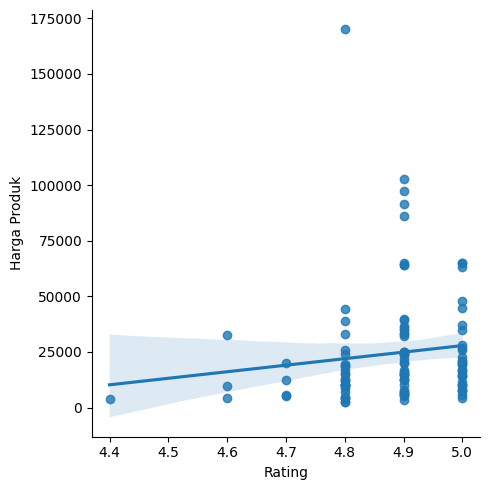

In [13]:
sns.lmplot(data=seblak, x='Rating', y='Harga Produk')

In [14]:
corr_r, pval_p = stats.pearsonr(seblak['Rating'], seblak['Harga Produk'])

print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")

r-correlation: 0.13, p-value: 0.19394855875948672


Untuk pengujian kita menggunakan teknik Pearson dikarenakan hubungannya datanya numerik dan dianggap terdistribusi normal.
Dengan demikian, analisa menyimpulkan bahwa meskipun terdapat hubungan yg positif antara rating dan produk namun hubungannya lemah dan tidak signifikan. Bisa diasumsikan mungkin ada faktor yg lain yg mempengaruhi kesukaan pelanggan terhadap produk selain dari harga

# 7. Conclusion

**Kesimpulan yang dapat diambil dari proses pengujian adalah:**

Untuk mencapai target penjualan awal 500 pcs dengan harga bersaing namun tetap mendapatkan margin dalam waktu 3 bulan kita bisa menjual dengan harga sedikit lebih rendah dari harga rata-rata namun tidak melewati batas atas `Rp. 19,733` dan batas bawah `Rp. 29,163` dari harga produk dengan potensi pendapatan maksimum dan minimum dari penjualan seblak adalah sekitar `Rp. 14,581,947` dan `Rp. 9,866,626`. Target penjualan 500 pcs mungkin bisa dicapai sebab target penjualan masih jauh dibawah rata-rata seblak terjual. Kita juga bisa menjual produk kita di JABODETABEK dan LUAR JABODETABEK karena tidak ada perbedaan harga yg signifikan, dan juga harga tidak terlalu mempengaruhi keputus pelanggan dalam membeli produk.